In [1312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
import pandas_datareader.data as web

In [1313]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [1314]:
stk_data

Attributes   Adj Close                               Close              \
Symbols           MSFT         IBM       GOOGL        MSFT         IBM   
Date                                                                     
2017-09-18   70.624084  108.947281   46.487499   75.160004  138.193115   
2017-09-19   70.887161  108.826691   46.842999   75.440002  138.040146   
2017-09-20   70.417366  109.949707   47.376999   74.940002  139.464630   
2017-09-21   69.731407  109.482430   47.377499   74.209999  138.871887   
2017-09-22   69.919334  109.384430   47.162998   74.410004  138.747604   
...                ...         ...         ...         ...         ...   
2022-09-09  264.459991  129.190002  110.650002  264.459991  129.190002   
2022-09-12  266.649994  130.660004  110.860001  266.649994  130.660004   
2022-09-13  251.990005  127.250000  104.320000  251.990005  127.250000   
2022-09-14  252.220001  127.690002  105.000000  252.220001  127.690002   
2022-09-15  245.380005  125.489998  102.910004  245.380005  125.489998   

Attributes                    High                                 Low  \
Symbols          GOOGL        MSFT         IBM       GOOGL        MSFT   
Date                                                                     
2017-09-18   46.487499   75.970001  139.082214   46.842999   75.040001   
2017-09-19   46.842999   75.709999  138.604202   46.896999   75.010002   
2017-09-20   47.376999   75.550003  139.464630   47.500000   74.309998   
2017-09-21   47.377499   75.239998  139.474182   47.639999   74.110001   
2017-09-22   47.162998   74.510002  139.187378   47.500000   73.849998   
...                ...         ...         ...         ...         ...   
2022-09-09  110.650002  265.230011  129.490005  110.989998  260.290009   
2022-09-12  110.860001  267.450012  130.990005  111.620003  265.160004   
2022-09-13  104.320000  260.399994  129.910004  108.300003  251.589996   
2022-09-14  105.000000  254.229996  129.000000  105.279999  249.860001   
2022-09-15  102.910004  251.399994  127.470001  105.269997  244.020004   

Attributes                                Open                          \
Symbols            IBM       GOOGL        MSFT         IBM       GOOGL   
Date                                                                     
2017-09-18  137.925430   46.270000   75.230003  138.441681   46.750500   
2017-09-19  137.877625   46.333000   75.209999  138.422562   46.670502   
2017-09-20  138.068832   46.875000   75.349998  138.556412   46.886501   
2017-09-21  138.718933   46.969002   75.110001  139.244736   47.406502   
2017-09-22  138.231354   47.042000   73.989998  139.187378   47.138500   
...                ...         ...         ...         ...         ...   
2022-09-09  128.059998  109.019997  260.500000  128.899994  109.070000   
2022-09-12  129.889999  109.930000  265.779999  130.330002  110.989998   
2022-09-13  126.769997  104.089996  258.839996  129.139999  107.800003   
2022-09-14  126.849998  103.660004  253.529999  127.500000  104.570000   
2022-09-15  124.900002  102.349998  249.770004  127.389999  104.029999   

Attributes      Volume                         
Symbols           MSFT        IBM       GOOGL  
Date                                           
2017-09-18  23307000.0  3158397.0  29474000.0  
2017-09-19  16093300.0  3623762.0  24854000.0  
2017-09-20  21587900.0  5698085.0  40080000.0  
2017-09-21  19186100.0  2673158.0  27414000.0  
2017-09-22  14111400.0  2920746.0  21496000.0  
...                ...        ...         ...  
2022-09-09  22084700.0  3291900.0  23197700.0  
2022-09-12  18747700.0  3741100.0  22966800.0  
2022-09-13  33353300.0  4565600.0  38172900.0  
2022-09-14  23913000.0  3819100.0  26395100.0  
2022-09-15  31470200.0  5140600.0  34115600.0  

[1258 rows x 18 columns]

In [1315]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2017-09-18,111.48,1.3485
2017-09-19,111.49,1.3517
2017-09-20,111.50,1.3564
2017-09-21,112.30,1.3576
2017-09-22,112.01,1.3531
...,...,...
2022-09-05,NaN,NaN
2022-09-06,142.95,1.1549
2022-09-07,144.39,1.1473


In [1316]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-18,2503.87,22331.35,10.15
2017-09-19,2506.65,22370.80,10.18
2017-09-20,2508.24,22412.59,9.78
2017-09-21,2500.60,22359.23,9.67
2017-09-22,2502.22,22349.59,9.59
...,...,...,...
2022-09-09,4067.36,32151.71,22.79
2022-09-12,4110.41,32381.34,23.87
2022-09-13,3932.69,31104.97,27.27


In [1317]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [1318]:
X1

Attributes   Adj Close            
Symbols          GOOGL         IBM
Date                              
2017-09-18   46.487499  108.947281
2017-09-19   46.842999  108.826691
2017-09-20   47.376999  109.949707
2017-09-21   47.377499  109.482430
2017-09-22   47.162998  109.384430
...                ...         ...
2022-09-09  110.650002  129.190002
2022-09-12  110.860001  130.660004
2022-09-13  104.320000  127.250000
2022-09-14  105.000000  127.690002
2022-09-15  102.910004  125.489998

[1258 rows x 2 columns]

In [1319]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-09-18,111.48,1.3485
2017-09-19,111.49,1.3517
2017-09-20,111.50,1.3564
2017-09-21,112.30,1.3576
2017-09-22,112.01,1.3531
...,...,...
2022-09-05,NaN,NaN
2022-09-06,142.95,1.1549
2022-09-07,144.39,1.1473


In [1320]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-18,2503.87,22331.35,10.15
2017-09-19,2506.65,22370.80,10.18
2017-09-20,2508.24,22412.59,9.78
2017-09-21,2500.60,22359.23,9.67
2017-09-22,2502.22,22349.59,9.59
...,...,...,...
2022-09-09,4067.36,32151.71,22.79
2022-09-12,4110.41,32381.34,23.87
2022-09-13,3932.69,31104.97,27.27


In [1321]:
X1.describe()

Attributes    Adj Close             
Symbols           GOOGL          IBM
count       1258.000000  1258.000000
mean          83.111854   115.405179
std           31.646755    10.826210
min           46.487499    79.847008
25%           57.007874   108.965229
50%           68.558498   114.039936
75%          112.697622   123.756395
max          149.838501   141.102219

In [1322]:
X2.describe()

,DEXJPUS,DEXUSUK
count,1242.000000,1242.000000
mean,111.733357,1.311815
std,7.427419,0.058030
min,102.520000,1.147300
25%,107.700000,1.273525
50%,109.810000,1.311450
75%,112.732500,1.356375
max,144.390000,1.433200


In [1323]:
X3.describe()

,SP500,DJIA,VIXCLS
count,1258.000000,1258.000000,1261.00000
mean,3377.166820,28552.732989,20.43613
std,689.833354,4139.897294,8.70150
min,2237.400000,18591.930000,9.14000
25%,2790.657500,25296.882500,14.63000
50%,3115.600000,27089.400000,18.71000
75%,4019.357500,32650.240000,24.35000
max,4796.560000,36799.650000,82.69000


In [1324]:
X1.fillna(X1.median(),inplace = True)
X2.fillna(X2.median(),inplace = True)
X3.fillna(X3.median(),inplace = True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_29348\15481099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.fillna(X1.median(),inplace = True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_29348\15481099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.fillna(X1.median(),inplace = True)


In [1325]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-09-18,111.48,1.34850
2017-09-19,111.49,1.35170
2017-09-20,111.50,1.35640
2017-09-21,112.30,1.35760
2017-09-22,112.01,1.35310
...,...,...
2022-09-05,109.81,1.31145
2022-09-06,142.95,1.15490
2022-09-07,144.39,1.14730


In [1326]:
X3.describe()

,SP500,DJIA,VIXCLS
count,1304.000000,1304.000000,1304.000000
mean,3367.939770,28501.112347,20.379210
std,679.264665,4075.122973,8.562272
min,2237.400000,18591.930000,9.140000
25%,2798.412500,25333.410000,14.732500
50%,3115.600000,27089.400000,18.710000
75%,3973.842500,32286.805000,24.102500
max,4796.560000,36799.650000,82.690000


In [1327]:
scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [1328]:
X1

Attributes Adj Close          
Symbols        GOOGL       IBM
Date                          
2017-09-18 -1.157746 -0.596743
2017-09-19 -1.146509 -0.607886
2017-09-20 -1.129628 -0.504114
2017-09-21 -1.129612 -0.547293
2017-09-22 -1.136393 -0.556348
...              ...       ...
2022-09-09  0.870519  1.273789
2022-09-12  0.877157  1.409625
2022-09-13  0.670419  1.094523
2022-09-14  0.691915  1.135181
2022-09-15  0.625847  0.931889

[1258 rows x 2 columns]

In [1329]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-09-18,-0.023053,0.647325
2017-09-19,-0.021677,0.703765
2017-09-20,-0.020301,0.786661
2017-09-21,0.089774,0.807826
2017-09-22,0.049871,0.728457
...,...,...
2022-09-05,-0.252835,-0.006143
2022-09-06,4.307022,-2.767289
2022-09-07,4.505157,-2.901334


In [1330]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-18,-1.272554,-1.514587,-1.195142
2017-09-19,-1.268460,-1.504903,-1.191637
2017-09-20,-1.266119,-1.494644,-1.238372
2017-09-21,-1.277370,-1.507743,-1.251224
2017-09-22,-1.274984,-1.510110,-1.260571
...,...,...,...
2022-09-09,1.030068,0.896169,0.281668
2022-09-12,1.093469,0.952540,0.407851
2022-09-13,0.831733,0.639209,0.805094


In [1331]:
Y = pd.DataFrame()
return_period = 1
Y = base.shift(-return_period)
X4_3DT = base.diff(3*return_period).shift(-3*return_period)
X4_6DT = base.diff(6*return_period).shift(-6*return_period)
X4_12DT = base.diff(12*return_period).shift(-12*return_period)
X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [1332]:
Y

Date
2017-09-18     70.887161
2017-09-19     70.417366
2017-09-20     69.731407
2017-09-21     69.919334
2017-09-22     68.838745
                 ...    
2022-09-09    266.649994
2022-09-12    251.990005
2022-09-13    252.220001
2022-09-14    245.380005
2022-09-15           NaN
Name: (Adj Close, MSFT), Length: 1258, dtype: float64

In [1333]:
X4

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2017-09-18,-0.231716,-0.342112,-0.209739
2017-09-19,-0.244897,-0.304908,-0.122154
2017-09-20,-0.352028,-0.242518,-0.075739
2017-09-21,-0.231713,-0.080519,0.013597
2017-09-22,-0.167434,-0.090120,-0.003919
...,...,...,...
2022-09-09,-2.222002,NaN,NaN
2022-09-12,-3.805838,NaN,NaN
2022-09-13,NaN,NaN,NaN


In [1334]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [1335]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,-1.157746,-0.596743,-0.023053,0.647325,-1.272554,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,-1.146509,-0.607886,-0.021677,0.703765,-1.268460,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,-1.129628,-0.504114,-0.020301,0.786661,-1.266119,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,-1.129612,-0.547293,0.089774,0.807826,-1.277370,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,-1.136393,-0.556348,0.049871,0.728457,-1.274984,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...,...,...
2022-09-09,0.870519,1.273789,4.236849,-2.677338,1.030068,0.896169,0.281668,-2.222002,NaN,NaN
2022-09-12,0.877157,1.409625,NaN,NaN,1.093469,0.952540,0.407851,-3.805838,NaN,NaN
2022-09-13,0.670419,1.094523,NaN,NaN,0.831733,0.639209,0.805094,NaN,NaN,NaN
2022-09-14,0.691915,1.135181,NaN,NaN,0.851350,0.646603,0.675406,NaN,NaN,NaN


In [1336]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,70.887161,-1.157746,-0.596743,-0.023053,0.647325,-1.272554,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,70.417366,-1.146509,-0.607886,-0.021677,0.703765,-1.268460,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,69.731407,-1.129628,-0.504114,-0.020301,0.786661,-1.266119,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,69.919334,-1.129612,-0.547293,0.089774,0.807826,-1.277370,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,68.838745,-1.136393,-0.556348,0.049871,0.728457,-1.274984,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,266.649994,0.870519,1.273789,4.236849,-2.677338,1.030068,0.896169,0.281668,-2.222002,NaN,NaN
2022-09-12,251.990005,0.877157,1.409625,NaN,NaN,1.093469,0.952540,0.407851,-3.805838,NaN,NaN
2022-09-13,252.220001,0.670419,1.094523,NaN,NaN,0.831733,0.639209,0.805094,NaN,NaN,NaN
2022-09-14,245.380005,0.691915,1.135181,NaN,NaN,0.851350,0.646603,0.675406,NaN,NaN,NaN


In [1337]:
dataset = dataset[dataset.isnull().sum(axis=1)<2]

In [1338]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,70.887161,-1.157746,-0.596743,-0.023053,0.647325,-1.272554,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,70.417366,-1.146509,-0.607886,-0.021677,0.703765,-1.268460,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,69.731407,-1.129628,-0.504114,-0.020301,0.786661,-1.266119,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,69.919334,-1.129612,-0.547293,0.089774,0.807826,-1.277370,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,68.838745,-1.136393,-0.556348,0.049871,0.728457,-1.274984,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,260.399994,0.793703,1.205409,3.720872,-2.594442,0.864590,0.738744,0.641523,-1.516907,0.267716,NaN
2022-09-01,256.059998,0.841752,1.317219,3.891488,-2.781399,0.882042,0.774582,0.605304,-0.480310,0.684031,NaN
2022-09-02,253.250000,0.782007,1.144421,3.905248,-2.709085,0.819318,0.691613,0.594789,0.356333,-0.633871,NaN
2022-09-06,258.089996,0.749131,1.045548,4.307022,-2.767289,0.795651,0.649110,0.763033,1.891057,-0.245652,NaN


In [1339]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1252 entries, 2017-09-18 to 2022-09-07
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1252 non-null   float64
 1   (Adj Close, GOOGL)  1252 non-null   float64
 2   (Adj Close, IBM)    1252 non-null   float64
 3   DEXJPUS             1252 non-null   float64
 4   DEXUSUK             1252 non-null   float64
 5   SP500               1252 non-null   float64
 6   DJIA                1252 non-null   float64
 7   VIXCLS              1252 non-null   float64
 8   MSFT_3DT            1252 non-null   float64
 9   MSFT_6DT            1252 non-null   float64
 10  MSFT_12DT           1246 non-null   float64
dtypes: float64(11)
memory usage: 117.4 KB


In [1340]:
#for i in dataset.columns:
#    dataset[i] = dataset[i].fillna(dataset[i].median,inplace=True)

In [1341]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,70.887161,-1.157746,-0.596743,-0.023053,0.647325,-1.272554,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,70.417366,-1.146509,-0.607886,-0.021677,0.703765,-1.268460,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,69.731407,-1.129628,-0.504114,-0.020301,0.786661,-1.266119,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,69.919334,-1.129612,-0.547293,0.089774,0.807826,-1.277370,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,68.838745,-1.136393,-0.556348,0.049871,0.728457,-1.274984,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,260.399994,0.793703,1.205409,3.720872,-2.594442,0.864590,0.738744,0.641523,-1.516907,0.267716,NaN
2022-09-01,256.059998,0.841752,1.317219,3.891488,-2.781399,0.882042,0.774582,0.605304,-0.480310,0.684031,NaN
2022-09-02,253.250000,0.782007,1.144421,3.905248,-2.709085,0.819318,0.691613,0.594789,0.356333,-0.633871,NaN
2022-09-06,258.089996,0.749131,1.045548,4.307022,-2.767289,0.795651,0.649110,0.763033,1.891057,-0.245652,NaN


In [1342]:
dataset['MSFT_12DT'].fillna(dataset['MSFT_12DT'].median(),inplace = True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_29348\3822104876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['MSFT_12DT'].fillna(dataset['MSFT_12DT'].median(),inplace = True)


In [1343]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,70.887161,-1.157746,-0.596743,-0.023053,0.647325,-1.272554,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,70.417366,-1.146509,-0.607886,-0.021677,0.703765,-1.268460,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,69.731407,-1.129628,-0.504114,-0.020301,0.786661,-1.266119,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,69.919334,-1.129612,-0.547293,0.089774,0.807826,-1.277370,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,68.838745,-1.136393,-0.556348,0.049871,0.728457,-1.274984,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,260.399994,0.793703,1.205409,3.720872,-2.594442,0.864590,0.738744,0.641523,-1.516907,0.267716,0.052711
2022-09-01,256.059998,0.841752,1.317219,3.891488,-2.781399,0.882042,0.774582,0.605304,-0.480310,0.684031,0.052711
2022-09-02,253.250000,0.782007,1.144421,3.905248,-2.709085,0.819318,0.691613,0.594789,0.356333,-0.633871,0.052711
2022-09-06,258.089996,0.749131,1.045548,4.307022,-2.767289,0.795651,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1344]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03,1252.000000
mean,180.905039,-0.003622,-0.005633,0.000757,0.003485,0.009236,0.009105,0.001904,0.005789,8.512892e-18,0.000253
std,79.123634,1.001397,0.999416,1.001477,1.011184,1.016399,1.017365,1.018483,0.993201,1.000400e+00,0.998006
min,68.838745,-1.157746,-3.285759,-1.255893,-2.901334,-1.664997,-2.432561,-1.313147,-5.071825,-4.516882e+00,-3.609778
25%,104.494541,-0.825926,-0.596916,-0.539374,-0.667107,-0.851486,-0.788631,-0.679018,-0.362320,-3.732709e-01,-0.342597
50%,165.131874,-0.473747,-0.128347,-0.252835,-0.006143,-0.375277,-0.350306,-0.200866,0.042180,5.079773e-02,0.052711
75%,253.150158,0.941581,0.753524,0.139995,0.766819,0.957863,1.037619,0.456046,0.440818,4.380334e-01,0.436664
max,340.882812,2.109322,2.374539,4.505157,2.141218,2.103993,2.037171,7.280159,4.972596,3.781521e+00,3.303756


In [1345]:
yaoyi = dataset.columns[0]
dataset = dataset.drop(dataset.columns[0],axis = 1)

In [1346]:
dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,-1.157746,-0.596743,-0.023053,0.647325,-1.272554,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,-1.146509,-0.607886,-0.021677,0.703765,-1.268460,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,-1.129628,-0.504114,-0.020301,0.786661,-1.266119,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,-1.129612,-0.547293,0.089774,0.807826,-1.277370,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,-1.136393,-0.556348,0.049871,0.728457,-1.274984,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.793703,1.205409,3.720872,-2.594442,0.864590,0.738744,0.641523,-1.516907,0.267716,0.052711
2022-09-01,0.841752,1.317219,3.891488,-2.781399,0.882042,0.774582,0.605304,-0.480310,0.684031,0.052711
2022-09-02,0.782007,1.144421,3.905248,-2.709085,0.819318,0.691613,0.594789,0.356333,-0.633871,0.052711
2022-09-06,0.749131,1.045548,4.307022,-2.767289,0.795651,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1347]:
data = dataset.corr()
data

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
"(Adj Close, GOOGL)",1.000000,0.603634,0.389613,0.248677,0.985323,0.960321,0.154263,-0.055039,-0.075926,-0.102099
"(Adj Close, IBM)",0.603634,1.000000,0.565974,0.206565,0.610825,0.661818,-0.281605,-0.088180,-0.132680,-0.171040
DEXJPUS,0.389613,0.565974,1.000000,-0.396540,0.349359,0.341193,0.060634,-0.069212,-0.116874,-0.152552
DEXUSUK,0.248677,0.206565,-0.396540,1.000000,0.259851,0.304547,-0.328606,0.003321,0.018292,0.025229
SP500,0.985323,0.610825,0.349359,0.259851,1.000000,0.986271,0.109973,-0.062768,-0.088769,-0.121691
DJIA,0.960321,0.661818,0.341193,0.304547,0.986271,1.000000,-0.002889,-0.065233,-0.092075,-0.124291
VIXCLS,0.154263,-0.281605,0.060634,-0.328606,0.109973,-0.002889,1.000000,0.060873,0.079942,0.109479
MSFT_3DT,-0.055039,-0.088180,-0.069212,0.003321,-0.062768,-0.065233,0.060873,1.000000,0.685645,0.495207
MSFT_6DT,-0.075926,-0.132680,-0.116874,0.018292,-0.088769,-0.092075,0.079942,0.685645,1.000000,0.682079
MSFT_12DT,-0.102099,-0.171040,-0.152552,0.025229,-0.121691,-0.124291,0.109479,0.495207,0.682079,1.000000


<AxesSubplot:>

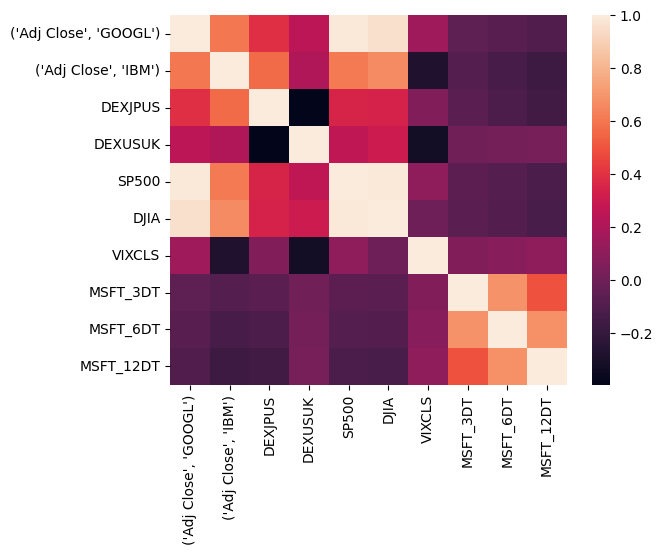

In [1348]:
sns.heatmap(data)

In [1349]:
lower = pd.DataFrame(np.tril(data, -1),columns = data.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.603634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.389613,0.565974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.248677,0.206565,-0.396540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.985323,0.610825,0.349359,0.259851,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.960321,0.661818,0.341193,0.304547,0.986271,0.000000,0.000000,0.000000,0.000000,0.0
6,0.154263,-0.281605,0.060634,-0.328606,0.109973,-0.002889,0.000000,0.000000,0.000000,0.0
7,-0.055039,-0.088180,-0.069212,0.003321,-0.062768,-0.065233,0.060873,0.000000,0.000000,0.0
8,-0.075926,-0.132680,-0.116874,0.018292,-0.088769,-0.092075,0.079942,0.685645,0.000000,0.0
9,-0.102099,-0.171040,-0.152552,0.025229,-0.121691,-0.124291,0.109479,0.495207,0.682079,0.0


In [1350]:
to_drop = [column for column in lower if any(lower[column] > 0.75)]
dataset.drop(to_drop, inplace=True, axis=1)
dataset

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,-0.596743,-0.023053,0.647325,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,-0.607886,-0.021677,0.703765,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,-0.504114,-0.020301,0.786661,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,-0.547293,0.089774,0.807826,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,-0.556348,0.049871,0.728457,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...
2022-08-31,1.205409,3.720872,-2.594442,0.738744,0.641523,-1.516907,0.267716,0.052711
2022-09-01,1.317219,3.891488,-2.781399,0.774582,0.605304,-0.480310,0.684031,0.052711
2022-09-02,1.144421,3.905248,-2.709085,0.691613,0.594789,0.356333,-0.633871,0.052711
2022-09-06,1.045548,4.307022,-2.767289,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1351]:
dataset

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,-0.596743,-0.023053,0.647325,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,-0.607886,-0.021677,0.703765,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,-0.504114,-0.020301,0.786661,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,-0.547293,0.089774,0.807826,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,-0.556348,0.049871,0.728457,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...
2022-08-31,1.205409,3.720872,-2.594442,0.738744,0.641523,-1.516907,0.267716,0.052711
2022-09-01,1.317219,3.891488,-2.781399,0.774582,0.605304,-0.480310,0.684031,0.052711
2022-09-02,1.144421,3.905248,-2.709085,0.691613,0.594789,0.356333,-0.633871,0.052711
2022-09-06,1.045548,4.307022,-2.767289,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1352]:
dataset.insert(loc=0, column=yaoyi, value=Y)

In [1353]:
dataset

,"(Adj Close, MSFT)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,70.887161,-0.596743,-0.023053,0.647325,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,70.417366,-0.607886,-0.021677,0.703765,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,69.731407,-0.504114,-0.020301,0.786661,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,69.919334,-0.547293,0.089774,0.807826,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,68.838745,-0.556348,0.049871,0.728457,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...,...
2022-08-31,260.399994,1.205409,3.720872,-2.594442,0.738744,0.641523,-1.516907,0.267716,0.052711
2022-09-01,256.059998,1.317219,3.891488,-2.781399,0.774582,0.605304,-0.480310,0.684031,0.052711
2022-09-02,253.250000,1.144421,3.905248,-2.709085,0.691613,0.594789,0.356333,-0.633871,0.052711
2022-09-06,258.089996,1.045548,4.307022,-2.767289,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1354]:
Y = pd.DataFrame()
Y = dataset[yaoyi]
Y

2017-09-18     70.887161
2017-09-19     70.417366
2017-09-20     69.731407
2017-09-21     69.919334
2017-09-22     68.838745
                 ...    
2022-08-31    260.399994
2022-09-01    256.059998
2022-09-02    253.250000
2022-09-06    258.089996
2022-09-07    258.519989
Name: (Adj Close, MSFT), Length: 1252, dtype: float64

In [1355]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03,1252.000000
mean,180.905039,-0.005633,0.000757,0.003485,0.009105,0.001904,0.005789,8.512892e-18,0.000253
std,79.123634,0.999416,1.001477,1.011184,1.017365,1.018483,0.993201,1.000400e+00,0.998006
min,68.838745,-3.285759,-1.255893,-2.901334,-2.432561,-1.313147,-5.071825,-4.516882e+00,-3.609778
25%,104.494541,-0.596916,-0.539374,-0.667107,-0.788631,-0.679018,-0.362320,-3.732709e-01,-0.342597
50%,165.131874,-0.128347,-0.252835,-0.006143,-0.350306,-0.200866,0.042180,5.079773e-02,0.052711
75%,253.150158,0.753524,0.139995,0.766819,1.037619,0.456046,0.440818,4.380334e-01,0.436664
max,340.882812,2.374539,4.505157,2.141218,2.037171,7.280159,4.972596,3.781521e+00,3.303756


In [1356]:
X = dataset.drop(dataset.columns[0],axis = 1)
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-18,-0.596743,-0.023053,0.647325,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
2017-09-19,-0.607886,-0.021677,0.703765,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2017-09-20,-0.504114,-0.020301,0.786661,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
2017-09-21,-0.547293,0.089774,0.807826,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
2017-09-22,-0.556348,0.049871,0.728457,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...
2022-08-31,1.205409,3.720872,-2.594442,0.738744,0.641523,-1.516907,0.267716,0.052711
2022-09-01,1.317219,3.891488,-2.781399,0.774582,0.605304,-0.480310,0.684031,0.052711
2022-09-02,1.144421,3.905248,-2.709085,0.691613,0.594789,0.356333,-0.633871,0.052711
2022-09-06,1.045548,4.307022,-2.767289,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1357]:
range(len(X))

range(0, 1252)

In [1358]:
Y = Y.reset_index()
Y = Y.drop(columns=['index'])
Y

C:\Users\ACER\AppData\Local\Temp\ipykernel_29348\987391753.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Y = Y.drop(columns=['index'])


,Adj Close
,MSFT
0,70.887161
1,70.417366
2,69.731407
3,69.919334
4,68.838745
...,...
1247,260.399994
1248,256.059998
1249,253.250000


In [1359]:
X = X.reset_index()
X = X.drop(columns=['index'])
X



,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.596743,-0.023053,0.647325,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
1,-0.607886,-0.021677,0.703765,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2,-0.504114,-0.020301,0.786661,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
3,-0.547293,0.089774,0.807826,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
4,-0.556348,0.049871,0.728457,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...
1247,1.205409,3.720872,-2.594442,0.738744,0.641523,-1.516907,0.267716,0.052711
1248,1.317219,3.891488,-2.781399,0.774582,0.605304,-0.480310,0.684031,0.052711
1249,1.144421,3.905248,-2.709085,0.691613,0.594789,0.356333,-0.633871,0.052711
1250,1.045548,4.307022,-2.767289,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1360]:
len(X)

1252

In [1361]:
Test_size = int(np.floor(0.3 * len( X )))
train_size = int(np.floor(0.7 * len( X )))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [1362]:
X_test

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
876,-0.177764,-0.382173,1.423373,1.050071,0.036312,0.148295,-0.083848,-0.527544
877,-0.098053,-0.349150,1.319312,1.092987,-0.040800,-0.783561,0.235209,-0.080213
878,-0.125992,-0.362910,1.365170,1.061685,-0.068841,-1.349954,-0.397866,0.258509
879,-0.061074,-0.334015,1.358115,1.108185,-0.134269,-0.257006,-0.706831,0.938714
880,0.023565,-0.368414,1.446302,1.070608,0.140296,1.113065,0.612276,1.409054
...,...,...,...,...,...,...,...,...
1247,1.205409,3.720872,-2.594442,0.738744,0.641523,-1.516907,0.267716,0.052711
1248,1.317219,3.891488,-2.781399,0.774582,0.605304,-0.480310,0.684031,0.052711
1249,1.144421,3.905248,-2.709085,0.691613,0.594789,0.356333,-0.633871,0.052711
1250,1.045548,4.307022,-2.767289,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1363]:
X_train

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.596743,-0.023053,0.647325,-1.514587,-1.195142,-0.231716,-0.342112,-0.209739
1,-0.607886,-0.021677,0.703765,-1.504903,-1.191637,-0.244897,-0.304908,-0.122154
2,-0.504114,-0.020301,0.786661,-1.494644,-1.238372,-0.352028,-0.242518,-0.075739
3,-0.547293,0.089774,0.807826,-1.507743,-1.251224,-0.231713,-0.080519,0.013597
4,-0.556348,0.049871,0.728457,-1.510110,-1.260571,-0.167434,-0.090120,-0.003919
...,...,...,...,...,...,...,...,...
871,-0.570555,-0.468857,1.232889,0.735275,0.500151,0.066886,0.290693,0.381847
872,-0.407851,-0.375293,1.220543,0.810428,0.594789,1.611904,1.187336,0.574217
873,-0.459621,-0.413820,1.351060,0.817866,0.426545,0.266075,0.296999,-0.301116
874,-0.156397,-0.422075,1.377516,0.931840,0.254795,0.338824,-0.328503,0.205124


In [1364]:
Y_test

,Adj Close
,MSFT
876,231.879425
877,234.743225
878,234.081573
879,227.840485
880,227.475082
...,...
1247,260.399994
1248,256.059998
1249,253.250000


In [1365]:
Y_train

,Adj Close
,MSFT
0,70.887161
1,70.417366
2,69.731407
3,69.919334
4,68.838745
...,...
871,224.552032
872,230.862274
873,229.519257


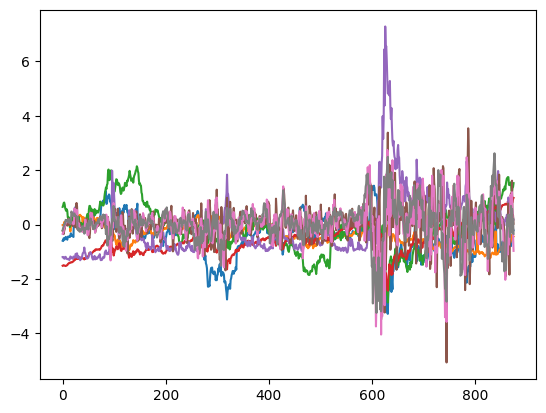

In [1366]:
plt.plot(X_train)

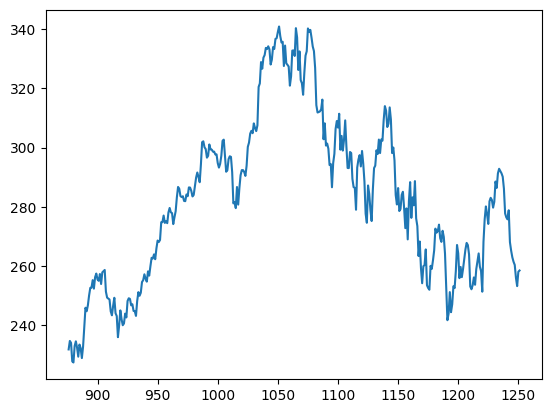

In [1367]:
plt.plot(Y_test)

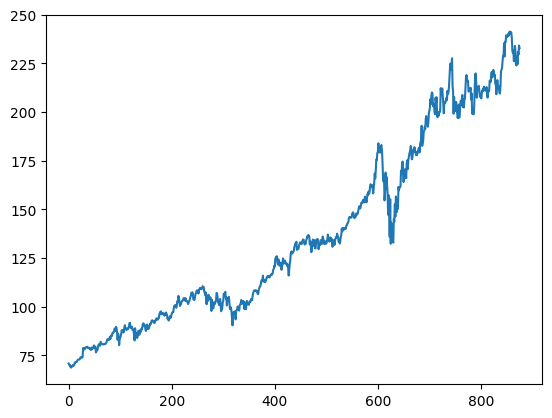

In [1368]:
plt.plot(Y_train)

In [1369]:
Num_fold = 3
Seed = 20
kfold = model_selection.KFold(n_splits=Num_fold, shuffle = True, random_state=Seed)
kfold

KFold(n_splits=3, random_state=20, shuffle=True)

In [1370]:
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Model_LM

LinearRegression(n_jobs=1, normalize=False)

In [1371]:
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)

In [1372]:
svr_poly

SVR(C=100, degree=2, kernel='poly')

In [1373]:
score_LM = model_selection.cross_val_score(Model_LM, X_train, Y_train, cv=kfold)
score_lin = model_selection.cross_val_score(svr_lin, X_train, Y_train, cv=kfold)
score_rbf = model_selection.cross_val_score(svr_rbf, X_train, Y_train, cv=kfold)
score_poly = model_selection.cross_val_score(svr_poly, X_train, Y_train, cv=kfold)


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\u

In [1374]:
score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly':score_poly})
score

,Linear Model,SVR_linear,SVR_rbf,SVR_poly
0,0.881267,0.878918,0.919438,0.835472
1,0.884065,0.863481,0.907002,0.867884
2,0.901533,0.894468,0.928755,0.823912


In [1375]:
score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()],'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})

In [1376]:
score_mean

,AVG Linear Model,AVG SVR_linear,AVG SVR_rbf,AVG SVC_poly
0,0.888955,0.878955,0.918398,0.842422


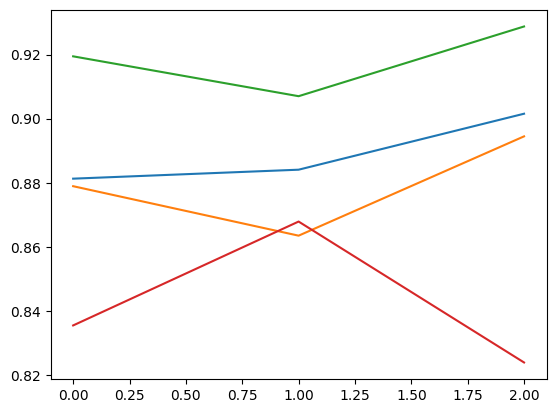

In [1377]:
plt.plot(score)

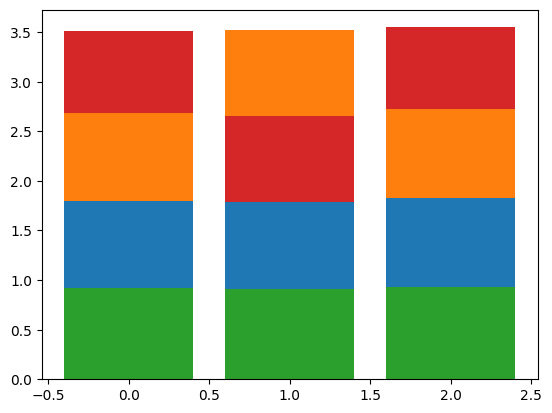

In [1378]:
fig, ax = plt.subplots()
x = score.index
indexes = np.argsort(score.values).T
heights = np.sort(score.values).T
order = -1
bottoms = heights[::order].cumsum(axis=0)
bottoms = np.insert(bottoms, 0, np.zeros(len(bottoms[0])), axis=0)
mpp_colors = dict(zip(score.columns, plt.rcParams['axes.prop_cycle'].by_key()['color']))
for btms, (idxs, vals) in enumerate(list(zip(indexes, heights))[::order]):
    mps = np.take(np.array(score.columns), idxs)
    ax.bar(x, height=vals, bottom=bottoms[btms], color=[mpp_colors[m] for m in mps])



In [1379]:
LM_pred = Model_LM.fit(X_train, Y_train).predict(X_test)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\u

In [1380]:
SVR_Linear

array([238.30514766, 235.93190187, 231.91600942, 234.77201015,
       238.60945699, 233.74841236, 227.8152909 , 227.14523743,
       228.45189222, 225.05754402, 228.63796477, 236.52404445,
       235.82016375, 232.32309858, 230.17463878, 235.9318802 ,
       238.77971933, 236.29456415, 237.89895777, 239.45638173,
       242.88065314, 243.78637845, 244.72876828, 247.98514738,
       250.45153737, 250.23639153, 248.11587513, 247.23505145,
       248.00532432, 244.80914924, 244.71572187, 242.61557319,
       238.55488546, 240.86415033, 241.60461724, 244.61543661,
       248.64166021, 247.58984747, 247.48010726, 245.18816813,
       252.01821235, 253.03769698, 254.15660134, 249.20014142,
       244.42799066, 247.60504129, 246.32410392, 248.40101282,
       247.62992314, 248.12453473, 245.17557517, 245.19610098,
       240.53134707, 240.03033627, 240.50606868, 246.36399906,
       245.91419886, 245.29839925, 243.64350231, 242.63239472,
       243.09838298, 241.9431822 , 236.60962239, 234.11

In [1381]:
len(SVR_Linear)

376

In [1382]:
X_test

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
876,-0.177764,-0.382173,1.423373,1.050071,0.036312,0.148295,-0.083848,-0.527544
877,-0.098053,-0.349150,1.319312,1.092987,-0.040800,-0.783561,0.235209,-0.080213
878,-0.125992,-0.362910,1.365170,1.061685,-0.068841,-1.349954,-0.397866,0.258509
879,-0.061074,-0.334015,1.358115,1.108185,-0.134269,-0.257006,-0.706831,0.938714
880,0.023565,-0.368414,1.446302,1.070608,0.140296,1.113065,0.612276,1.409054
...,...,...,...,...,...,...,...,...
1247,1.205409,3.720872,-2.594442,0.738744,0.641523,-1.516907,0.267716,0.052711
1248,1.317219,3.891488,-2.781399,0.774582,0.605304,-0.480310,0.684031,0.052711
1249,1.144421,3.905248,-2.709085,0.691613,0.594789,0.356333,-0.633871,0.052711
1250,1.045548,4.307022,-2.767289,0.649110,0.763033,1.891057,-0.245652,0.052711


In [1383]:
len(LM_pred)

376

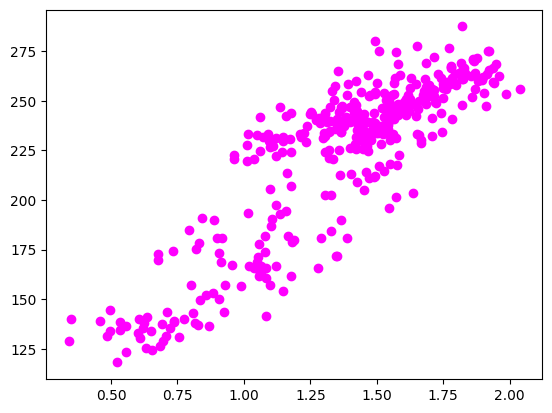

In [1384]:
plt.scatter(X_test['DJIA'], LM_pred,c='magenta')

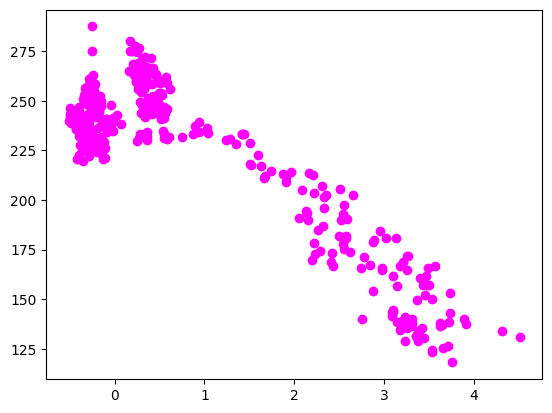

In [1385]:
plt.scatter(X_test["DEXJPUS"], LM_pred,c='magenta')

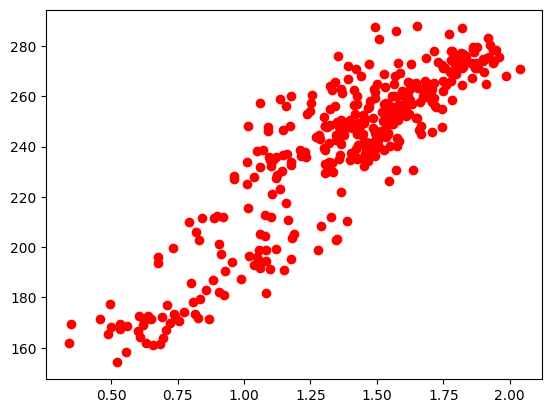

In [1386]:
plt.scatter(X_test["DJIA"],SVR_Linear,c='red')

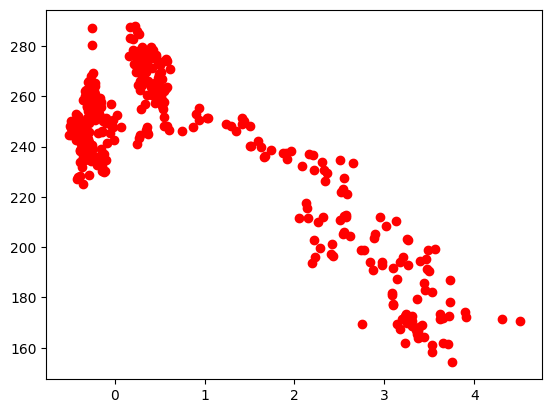

In [1387]:
plt.scatter(X_test["DEXJPUS"],SVR_Linear,c='red')

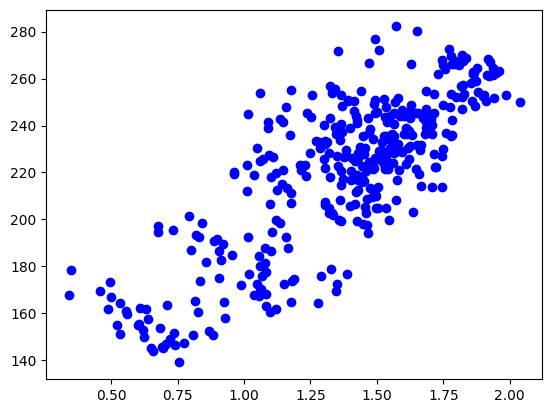

In [1388]:
plt.scatter(X_test['DJIA'], SVR_Rbf,c='blue')

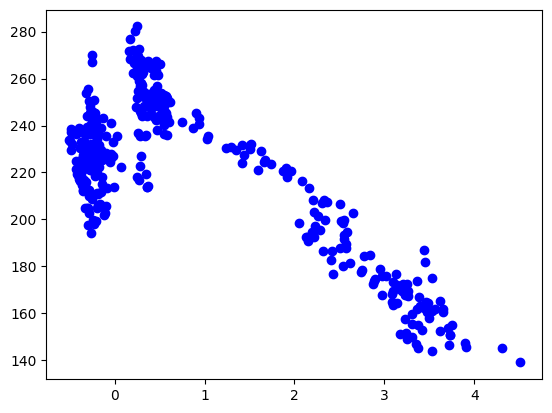

In [1389]:
plt.scatter(X_test["DEXJPUS"], SVR_Rbf,c='blue')

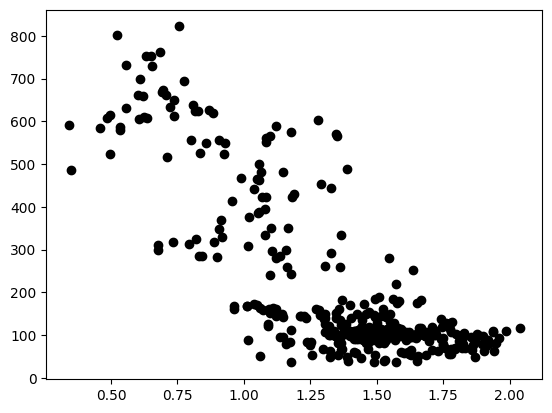

In [1390]:
plt.scatter(X_test['DJIA'], SVR_Poly,c='black')

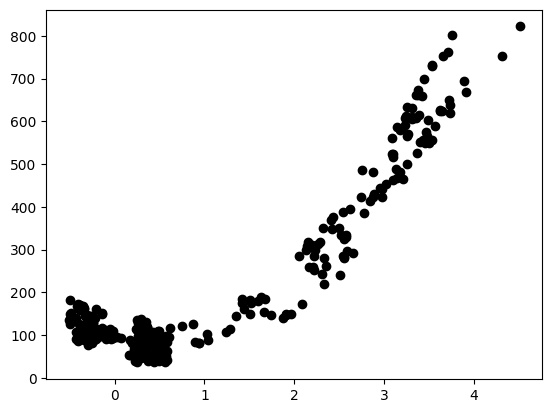

In [1391]:
plt.scatter(X_test['DEXJPUS'], SVR_Poly,c='black')

In [1392]:
Lm_MSE = metrics.mean_squared_error(Y_test, LM_pred)
Lm_MSE

4755.652861984662

In [1393]:
LM_r2 = metrics.r2_score(Y_test, LM_pred)
LM_r2

-5.199672353995537

In [1394]:
SVR_linear_MSE = metrics.mean_squared_error(Y_test, SVR_Linear)
SVR_linear_MSE

2608.931711440362

In [1395]:
SVR_linear_r2 = metrics.r2_score(Y_test, SVR_Linear)
SVR_linear_r2

-2.401114899317738

In [1396]:
SVR_Rbf_MSE = metrics.mean_squared_error(Y_test, SVR_Rbf)
SVR_Rbf_MSE

4591.181074746563

In [1397]:
SVR_Rbf_r2 = metrics.r2_score(Y_test, SVR_Rbf)
SVR_Rbf_r2

-4.985259901710966

In [1398]:
SVR_Poly_MSE = metrics.mean_squared_error(Y_test, SVR_Poly)
SVR_Poly_MSE

46067.93824975226

In [1399]:
SVR_Poly_r2 = metrics.r2_score(Y_test, SVR_Poly)
SVR_Poly_r2

-59.05613350285024

In [1400]:
mse = {Lm_MSE,SVR_linear_MSE,SVR_Rbf_MSE,SVR_Poly_MSE}
r2 = {LM_r2,SVR_linear_r2,SVR_Rbf_r2,SVR_Poly_r2}

In [1401]:
mse

{2608.931711440362, 4591.181074746563, 4755.652861984662, 46067.93824975226}

<BarContainer object of 4 artists>

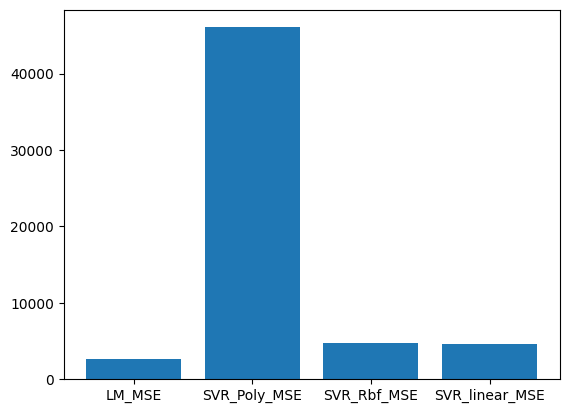

In [1406]:
plt.bar(["LM_MSE","SVR_Poly_MSE","SVR_Rbf_MSE","SVR_linear_MSE"],mse)

In [1403]:
r2

{-59.05613350285024,
 -5.199672353995537,
 -4.985259901710966,
 -2.401114899317738}

<BarContainer object of 4 artists>

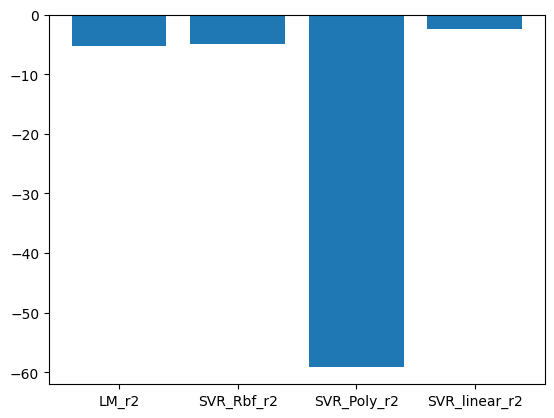

In [1404]:
plt.bar(["LM_r2","SVR_Rbf_r2","SVR_Poly_r2","SVR_linear_r2"],r2)